In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [5]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
!curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67119  100 67119    0     0   142k      0 --:--:-- --:--:-- --:--:--  145k


In [6]:
# That line may not work for you; if not, try
import urllib.request

req = urllib.request.Request('https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json')
with urllib.request.urlopen(req) as response:
   data = response.read().decode("utf8")
data[0:300]

'[\n  {\n    "Species": "Adelie",\n    "Island": "Torgersen",\n    "Beak Length (mm)": 39.1,\n    "Beak Depth (mm)": 18.7,\n    "Flipper Length (mm)": 181,\n    "Body Mass (g)": 3750,\n    "Sex": "MALE"\n  },\n  {\n    "Species": "Adelie",\n    "Island": "Torgersen",\n    "Beak Length (mm)": 39.5,\n    "Beak Depth'

In [7]:
data_pd = pd.read_json(data)

In [ ]:
# Check that the download was data and not a webpage with an error...
!head penguins.json

In [5]:
penguins = pd.read_json("penguins.json")

In [10]:

def penguincleanit(data):
    data["SP_A"] = data.Species == "Adelie"
    data["SP_G"] = data.Species == "Gentoo"
    data["SP_C"] = data.Species == "Chinstrap"
    data["sex"] = data.Sex == "MALE"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP_G"]*2  +  data["SP_C"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins).dropna()


In [ ]:
penguins = penguinclean


In [ ]:
penguins.describe()

In [ ]:
penguins.Sex.value_counts()

In [14]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

In [ ]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)
plt.xlabel("Beak Depth(mm)"); plt.ylabel("Body mass (g)")

In [ ]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" ,
              kind="scatter", color = penguins.Species.map(colors)  )

In [ ]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
XALL = penguinclean[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
XALLSS = StandardScaler().fit_transform(XALL) 
SPALL = penguinclean[["Species"]] 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

regs = LogisticRegression(max_iter=500).fit(XALLSS, SPALL)

In [ ]:
def accuracy_split(split) :
   X_train, X_test, Y_train, Y_test = train_test_split( 
    XALLSS, SPALL, test_size=split)
   fit = LogisticRegressionCV(max_iter=600).fit(X_train, Y_train.values.ravel())
   return ( accuracy_score( Y_test, fit.predict(X_test)))

In [ ]:
accuracy_split(0.5)

In [ ]:
splits = np.arange(0.1, 0.9, 0.1)
accuracies = []
for split in splits:
    acc = [ accuracy_split(split) for i in range(30)] 
    accuracies.append(acc) 
accuracies = np.array(accuracies)
accuracies

In [ ]:
accuracies = np.array(accuracies)

In [ ]:
plt.hist(accuracies.T)

In [ ]:
plt.plot(accuracies.mean(axis=1))


In [ ]:
plt.plot(accuracies.mean(axis=0))


In [81]:
XALL = penguinclean[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
XALLSS = StandardScaler().fit_transform(XALL) 
SEX = penguinclean[["sex"]] 

In [83]:
def accuracy_split_sex(split) :
   X_train, X_test, Y_train, Y_test = train_test_split( 
    XALLSS, SEX, test_size=split)
   fit = LogisticRegressionCV(max_iter=600).fit(X_train, Y_train.values.ravel())
   return ( accuracy_score( Y_test, fit.predict(X_test)))
accuracy_split_sex(0.5)

0.874251497005988

In [98]:
splits = np.arange(0.05, 1.0, 0.05)
accuracies = []
for split in splits:
    print(split)
    acc = [ accuracy_split_sex(split) for i in range(100)] 
    accuracies.append(acc) 
accuracies = np.array(accuracies)
accuracies

0.05
0.1
0.15000000000000002
0.2
0.25
0.3
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.6500000000000001
0.7000000000000001
0.7500000000000001
0.8
0.8500000000000001
0.9000000000000001
0.9500000000000001


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least

array([[0.94117647, 0.82352941, 0.88235294, ..., 0.88235294, 1.        ,
        1.        ],
       [0.97058824, 0.88235294, 0.97058824, ..., 0.85294118, 0.82352941,
        1.        ],
       [0.88235294, 0.88235294, 0.94117647, ..., 0.84313725, 0.98039216,
        0.92156863],
       ...,
       [0.79577465, 0.85915493, 0.88028169, ..., 0.90140845, 0.87676056,
        0.89084507],
       [0.86378738, 0.81727575, 0.86046512, ..., 0.86710963, 0.90033223,
        0.87043189],
       [0.71698113, 0.83647799, 0.85849057, ..., 0.8836478 , 0.74528302,
        0.83333333]])

In [99]:
m = [ np.average (a) for a in accuracies ] 
s = [ np.std( a) for a in accuracies ]

Text(0, 0.5, 'LogisticRegressionCV Penguin sex accuracy')

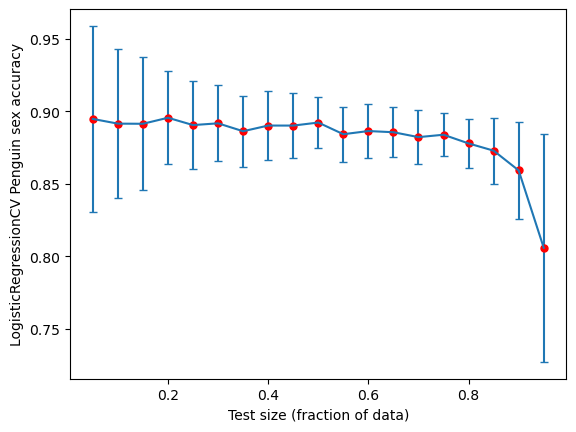

In [106]:
plt.errorbar(splits, m, yerr = s, capsize=3)
plt.plot(splits, m, 'o', color="red", markersize=5 )
plt.xlabel("Test size (fraction of data)")
plt.ylabel("LogisticRegressionCV Penguin sex accuracy")

ValueError: 'x' and 'y' must have the same size

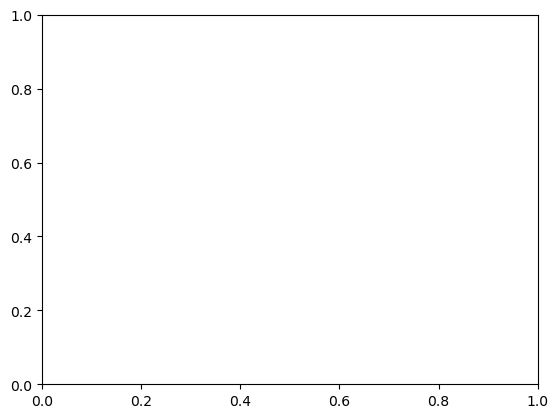

In [121]:
plt.errorbar(334- splits*334, m, yerr = s, capsize=3)
plt.plot(334 - splits*334, m, 'o', color="red", markersize=5 )
plt.xlabel("Training set size (individuals)")
plt.ylabel("Crude accuracy")
plt.title("LogisticRegressionCV Penguin sex accuracy")
plt.savefig("Penguin-sex-accuracy.png")

In [108]:
len(penguinclean)

334

In [111]:
splits = np.arange(0.75, 1.0, 0.01)
accuracies3 = []
for split in splits:
    print(split)
    acc = [ accuracy_split_sex(split) for i in range(100)] 
    accuracies3.append(acc) 
accuracies3 = np.array(accuracies3)
accuracies3

0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.8500000000000001
0.8600000000000001
0.8700000000000001
0.8800000000000001
0.8900000000000001
0.9000000000000001
0.9100000000000001
0.9200000000000002
0.9300000000000002
0.9400000000000002


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.9500000000000002


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least

0.9600000000000002


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least

0.9700000000000002


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least

0.9800000000000002


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: False

In [117]:
m3 = [ np.average (a) for a in accuracies3 ] 
s3 = [ np.std( a) for a in accuracies3 ]

Text(0, 0.5, 'LogisticRegressionCV Penguin sex accuracy')

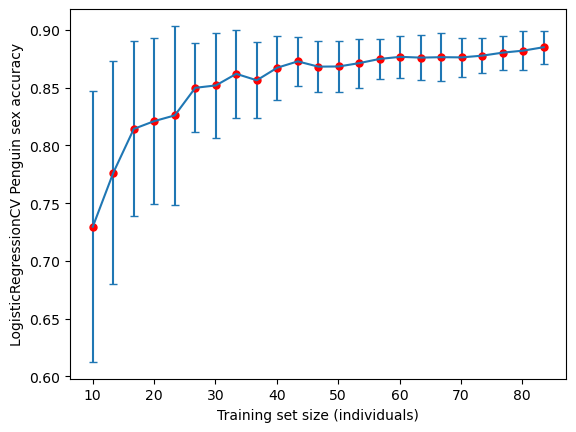

In [119]:
plt.errorbar(334- splits[:len(m3)]*334, m3, yerr = s3, capsize=3)
plt.plot(334 - splits[:len(m3)]*334, m3, 'o', color="red", markersize=5 )
plt.xlabel("Training set size (individuals)")
plt.ylabel("LogisticRegressionCV Penguin sex accuracy")

In [ ]:
splits = np.arange(0.75, 1.0, 0.01)
accuracies4 = []
for split in splits:
    acc = [ accuracy_split(split) for i in range(30)] 
    accuracies4.append(acc) 
accuracies4 = np.array(accuracies4)
accuracies4